# 总而言之先洗一下数据

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# 读取 CSV 文件，跳过有错误的行
df = pd.read_csv('../data/raw/董监高/TMT_FIGUREINFO.csv', on_bad_lines='skip')

/var/folders/tp/l76jfjh51rd22bj9xc1mgzpc0000gn/T/ipykernel_8322/3123332238.py:4: DtypeWarning: Columns (0,2,6,8,10,12,17,18,21,22,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/董监高/TMT_FIGUREINFO.csv', on_bad_lines='skip')


In [ ]:
# 删除重复的行
# df = df.drop_duplicates(subset='PersonID', keep='first')
# 筛选出 PersonID 缺失的行
filtered_df = df[df['PersonID'].isnull()]
print(filtered_df)

In [ ]:
# 统计一下每个PersonID出现的次数，把相同PersonID的行合并，并且添加一列，记录合并的次数
df['count'] = df.groupby('PersonID')['PersonID'].transform('count')
df = df.groupby('PersonID').first().reset_index()
print(df)

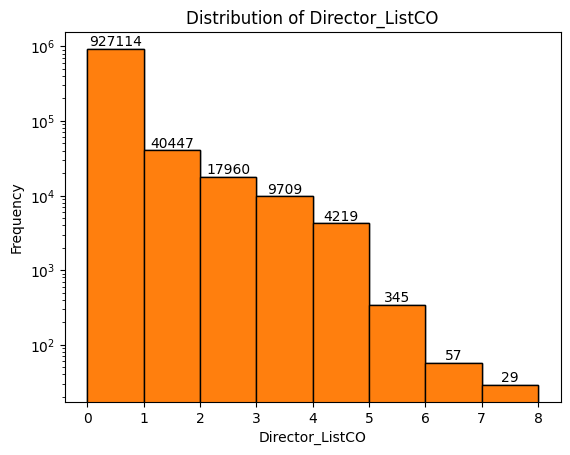

In [11]:
# 可视化 Director_ListCO 的分布
plt.hist(df['Director_ListCO'], bins=8,log=True, edgecolor='k')
plt.xlabel('Director_ListCO')
plt.ylabel('Frequency')
plt.title('Distribution of Director_ListCO')
# 在每个直方上标上对应的数
counts, bins, patches = plt.hist(df['Director_ListCO'], bins=8, log=True, edgecolor='k')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha='center', va='bottom')
# 显示图例
# plt.show()
# 打印筛选后的数据
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)